## Group neurons by cluster

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [22]:
DATA_PATH = r'../dataset/'
ANNOT_PATH = r'../clock_neurons_annotation.csv'

def mapper(string: str) -> str:
    if string[0].lower() == 'x':
        string = string[1:]
    time_pattern = r'(CT|ZT)(\d\d)'
    match = re.search(time_pattern, string)
    if match:
        string = re.sub(time_pattern, rf"{match.group(1).lower()}{match.group(2)}", string)
    return string

test_str = "x20190528_CLK856_DD_CT02_AR05_ACAGAC"
mapper(test_str)

'20190528_CLK856_DD_ct02_AR05_ACAGAC'

In [23]:
genexp_df = None
ct_pattern = r'_(CT)(\d\d)_'
for filename in os.listdir(DATA_PATH):
    # for now, ignore ct files
    if re.search(ct_pattern, filename):
        continue
    new_df = pd.read_csv(os.path.join(DATA_PATH, filename), index_col=0).head(10)
    new_df = new_df.rename(mapper, axis='columns').T
    if genexp_df is None:
        genexp_df = new_df
        continue
    genexp_df = pd.concat([genexp_df, new_df])
genexp_df

,EGFP,ERCC-00002,ERCC-00003,ERCC-00004,ERCC-00009,ERCC-00014,ERCC-00019,ERCC-00022,ERCC-00025,ERCC-00028
20190309_CLK856_LD_zt02_AR08_ACAGAC,49,63,31,88,4,0,0,0,1,0
20190309_CLK856_LD_zt02_AR08_ACAGGA,11,63,35,91,11,0,0,0,1,0
20190309_CLK856_LD_zt02_AR08_ACAGTG,1,1,0,1,0,0,0,0,0,0
20190309_CLK856_LD_zt02_AR08_ACCAAC,155,116,21,116,5,0,1,1,0,0
20190309_CLK856_LD_zt02_AR08_ACCAGA,9,47,22,68,6,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
20190309_CLK856_LD_zt22_AR02_TGGTGA,1,0,0,1,0,0,0,0,0,0
20190309_CLK856_LD_zt22_AR02_TGGTTG,5,54,4,55,5,0,0,0,0,0
20190309_CLK856_LD_zt22_AR02_TGTCAC,48,55,17,89,3,0,0,2,0,0
20190309_CLK856_LD_zt22_AR02_TGTCGA,5,59,3,63,1,0,1,0,1,0


In [24]:
annot_df = pd.read_csv(ANNOT_PATH, index_col=0)
annot_df['Idents']

20181215_CLK856_LD_zt14_AR07_ACAGGA         29:LPN
20181215_CLK856_LD_zt14_AR07_CTTCTG         29:LPN
20181231_CLK856_LD_zt14_AR02_GTACCA         29:LPN
20181231_CLK856_LD_zt14_AR02_TCCTTC         29:LPN
20181231_CLK856_LD_zt14_AR08_AGACAG         29:LPN
                                          ...     
20190710_CLK856_DD_zt06_AR04_GTCTTC    1:DN1p_CNMa
20190710_CLK856_DD_zt06_AR04_TCCTTC    1:DN1p_CNMa
20190719_CLK856_DD_zt06_AR18_GTCTTC    1:DN1p_CNMa
20190814_CLK856_DD_zt06_AR19_TCTGCA    1:DN1p_CNMa
20190814_CLK856_DD_zt06_AR20_CACTTC    1:DN1p_CNMa
Name: Idents, Length: 2615, dtype: object

In [25]:
genexp_df = genexp_df.merge(annot_df[['Idents']], left_index=True, right_index=True, how='left')
genexp_df['Idents']

20190309_CLK856_LD_zt02_AR08_ACAGAC         7:DN1p
20190309_CLK856_LD_zt02_AR08_ACAGGA            NaN
20190309_CLK856_LD_zt02_AR08_ACAGTG            NaN
20190309_CLK856_LD_zt02_AR08_ACCAAC        2:s_LNv
20190309_CLK856_LD_zt02_AR08_ACCAGA         29:LPN
                                          ...     
20190309_CLK856_LD_zt22_AR02_TGGTGA            NaN
20190309_CLK856_LD_zt22_AR02_TGGTTG            NaN
20190309_CLK856_LD_zt22_AR02_TGTCAC    1:DN1p_CNMa
20190309_CLK856_LD_zt22_AR02_TGTCGA            NaN
20190309_CLK856_LD_zt22_AR02_TGTCTG            NaN
Name: Idents, Length: 3453, dtype: object

In [26]:
clusters_df = genexp_df.groupby(['Idents']).sum()
clusters_df

,EGFP,ERCC-00002,ERCC-00003,ERCC-00004,ERCC-00009,ERCC-00014,ERCC-00019,ERCC-00022,ERCC-00025,ERCC-00028
Idents,,,,,,,,,,
12:LNd,3147,4138,479,2625,228,1,1,37,11,0
14:DN3,6227,4172,656,2865,272,1,1,41,11,0
15:DN1p_CNMa,1732,3098,392,1946,172,3,1,27,2,0
18:DN1p,1045,2800,426,1852,180,2,9,28,5,2
19:DN2,1308,2417,294,1496,130,1,2,26,4,2
1:DN1p_CNMa,8782,12744,1606,8145,817,0,20,88,34,1
20:DN3,1350,3510,400,2048,210,1,5,36,7,0
25:l_LNv,1351,1915,256,1306,124,0,1,17,10,0
29:LPN,248,1381,227,834,97,1,3,11,8,0


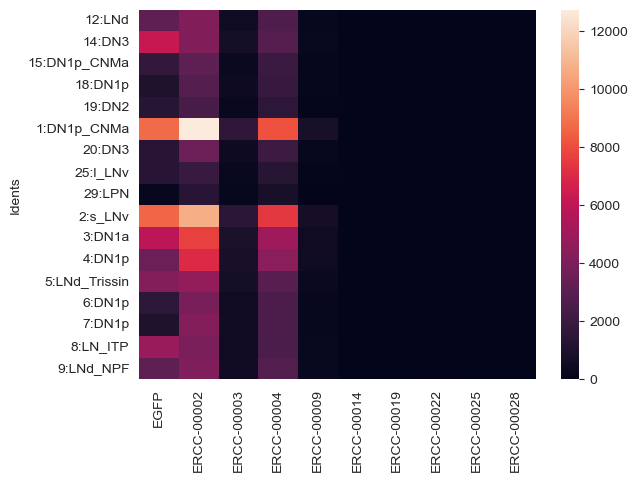

In [27]:
ax = sns.heatmap(clusters_df)
plt.show()